In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from keras.layers import Dense,Dropout
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from keras.layers.advanced_activations import ReLU, PReLU
from keras.optimizers import SGD, Adam
from scipy.stats import mode

In [7]:
train_x = pd.read_csv('train_x_3.csv')
train_y = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\train_y_xgboost.csv')
test_x = pd.read_csv('test_x_3.csv')

In [20]:
from models import Model1xgb, Model1NNproba, Model3logistic

In [9]:
def predict_cv(model, train_x, train_y, test_x):
    preds = []
    preds_test = []
    va_idxes = []

    kf = KFold(n_splits=4, shuffle=True, random_state=71)

    # クロスバリデーションで学習・予測を行い、予測値とインデックスを保存する
    for i, (tr_idx, va_idx) in enumerate(kf.split(train_x)):
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
        model.fit(tr_x, tr_y, va_x, va_y)
        pred = model.predict(va_x)
        preds.append(pred)
        pred_test = model.predict(test_x)
        preds_test.append(pred_test)
        va_idxes.append(va_idx)

    # バリデーションデータに対する予測値を連結し、その後元の順序に並べ直す
    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds, axis=0)
    order = np.argsort(va_idxes)
    pred_train = preds[order]

    # テストデータに対する予測値の平均をとる
    preds_test = np.mean(preds_test, axis=0)

    return pred_train, preds_test

In [13]:
model3_a = Model1xgb()
pred_train_3a, preds_test_3a = predict_cv( model3_a, train_x, train_y, test_x)

model3_b = Model1NNproba()
pred_test_3b, preds_test_3b = predict_cv(model3_b, train_x, train_y, test_x)

[13:07:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.06986	eval-error:0.06716
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 20 rounds.
[1]	train-error:0.06986	eval-error:0.06716
[2]	train-error:0.06986	eval-error:0.06716
[3]	train-error:0.06986	eval-error:0.06716
[4]	train-error:0.06986	eval-error:0.06716
[5]	train-error:0.06986	eval-error:0.06716
[6]	train-error:0.06986	eval-error:0.06716
[7]	train-error:0.06986	eval-error:0.06716
[8]	train-error:0.06986	eval-error:0.06716
[9]	train-error:0.06986	eval-error:0.06716
[10]	train-error:0.06986	eval-error:0.067

Epoch 16/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2367 - accuracy: 0.9301 - val_loss: 0.2331 - val_accuracy: 0.9328
Epoch 17/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2360 - accuracy: 0.9301 - val_loss: 0.2326 - val_accuracy: 0.9328
Epoch 18/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2364 - accuracy: 0.9301 - val_loss: 0.2324 - val_accuracy: 0.9328
Epoch 19/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2366 - accuracy: 0.9301 - val_loss: 0.2332 - val_accuracy: 0.9328
Epoch 20/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2362 - accuracy: 0.9301 - val_loss: 0.2333 - val_accuracy: 0.9328
Epoch 21/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2376 - accuracy: 0.9301 - val_loss: 0.2340 - val_accuracy: 0.9328
Epoch 22/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2365 - accuracy: 0.9301 - val_loss: 0.2337 - val_accuracy:

Epoch 24/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2361 - accuracy: 0.9306 - val_loss: 0.2329 - val_accuracy: 0.9315
Epoch 25/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2363 - accuracy: 0.9306 - val_loss: 0.2332 - val_accuracy: 0.9315
Epoch 26/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2363 - accuracy: 0.9306 - val_loss: 0.2332 - val_accuracy: 0.9315
Epoch 27/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2362 - accuracy: 0.9306 - val_loss: 0.2337 - val_accuracy: 0.9315
Epoch 28/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2366 - accuracy: 0.9306 - val_loss: 0.2330 - val_accuracy: 0.9315
Epoch 29/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2363 - accuracy: 0.9306 - val_loss: 0.2336 - val_accuracy: 0.9315
Epoch 30/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2366 - accuracy: 0.9306 - val_loss: 0.2355 - val_accuracy:

159/159 [==============================] - 1s 4ms/step - loss: 0.2338 - accuracy: 0.9322 - val_loss: 0.2414 - val_accuracy: 0.9268
Epoch 18/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2339 - accuracy: 0.9322 - val_loss: 0.2414 - val_accuracy: 0.9268
Epoch 19/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2336 - accuracy: 0.9322 - val_loss: 0.2412 - val_accuracy: 0.9268
Epoch 20/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2333 - accuracy: 0.9322 - val_loss: 0.2411 - val_accuracy: 0.9268
Epoch 21/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2336 - accuracy: 0.9322 - val_loss: 0.2423 - val_accuracy: 0.9268
Epoch 22/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2340 - accuracy: 0.9322 - val_loss: 0.2422 - val_accuracy: 0.9268


In [14]:
print(f'logloss: {log_loss(train_y, pred_train_3a, eps=1e-7):.4f}')
print(f'logloss: {log_loss(train_y, pred_train_3b, eps=1e-7):.4f}')

logloss: 0.2501
logloss: 0.2847


In [16]:
train_x_4 = pd.DataFrame({'pred_3a': pred_train_3a, 'pred_3b': pred_train_3b})
test_x_4 = pd.DataFrame({'pred_3a': preds_test_3a, 'pred_3b': preds_test_3b})

In [21]:
model4 = Model3logistic()
pred_train_4, preds_test_4 = predict_cv(model4, train_x_4, train_y, test_x_4)
print(f'logloss: {log_loss(train_y,pred_train_4, eps=1e-7):.4f}')

logloss: 0.2352


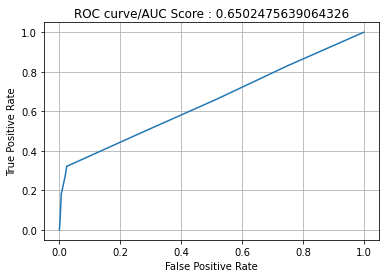

In [23]:
fig = plt.figure()

fpr,tpr,thresholds = roc_curve(train_y,pred_train_4)
auc_score = roc_auc_score(train_y,pred_train_4)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve/AUC Score : {auc_score}')

plt.grid(True)